## Error bars and array type recipes

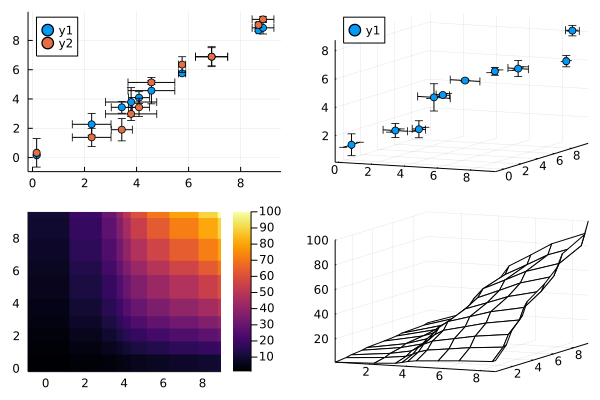

In [1]:
using Plots
begin
    struct Measurement <: Number
        val::Float64
        err::Float64
    end
    value(m::Measurement) = begin
            m.val
        end
    uncertainty(m::Measurement) = begin
            m.err
        end
    @recipe function f(::Type{T}, m::T) where T <: AbstractArray{<:Measurement}
            if !(get(plotattributes, :seriestype, :path) in [:contour, :contourf, :contour3d, :heatmap, :surface, :wireframe, :image])
                error_sym = Symbol(plotattributes[:letter], :error)
                plotattributes[error_sym] = uncertainty.(m)
            end
            value.(m)
        end
    x = Measurement.(10 * sort(rand(10)), rand(10))
    y = Measurement.(10 * sort(rand(10)), rand(10))
    z = Measurement.(10 * sort(rand(10)), rand(10))
    surf = Measurement.((1:10) .* (1:10)', rand(10, 10))
    plot(scatter(x, [x y]), scatter(x, y, z), heatmap(x, y, surf), wireframe(x, y, surf), legend = :topleft)
end


## Tuples and Points as data

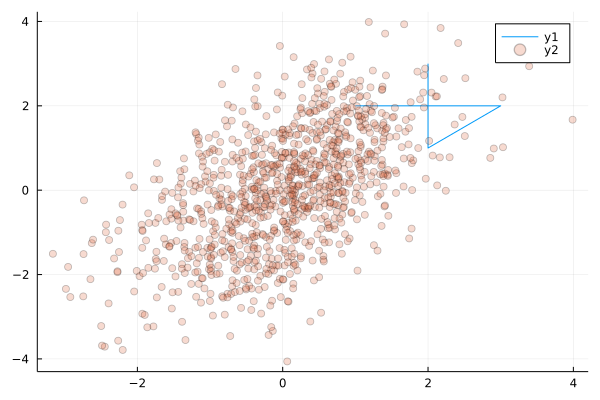

In [4]:
using GeometryBasics
using Distributions
d = MvNormal([1.0 0.75; 0.75 2.0])
plot([(1, 2), (3, 2), (2, 1), (2, 3)])
scatter!(Point2.(eachcol(rand(d, 1000))), alpha = 0.25)

## Mesh3d
Allows to plot arbitrary 3d meshes. If only x,y,z are given the mesh is generated automatically. You can also specify the connections using the connections keyword. The connections can be specified in two ways: Either as a tuple of vectors where each vector contains the 0-based indices of one point of a triangle, such that elements at the same position of these vectors form a triangle. Or as a vector of NTuple{3,Ints} where each element contains the 1-based indices of the three points of a triangle.

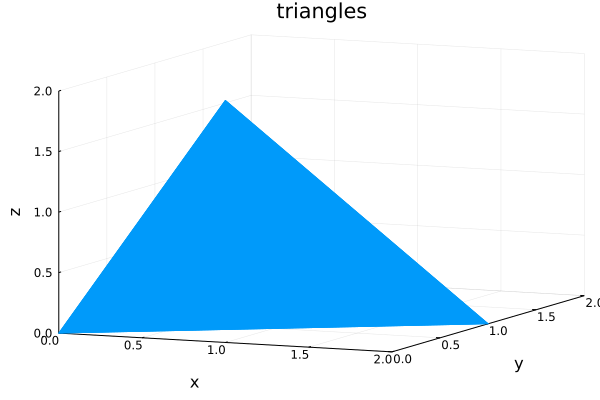

In [5]:
x = [0, 1, 2, 0]
y = [0, 0, 1, 2]
z = [0, 2, 0, 1]
i = [0, 0, 0, 1]
j = [1, 2, 3, 2]
k = [2, 3, 1, 3]
mesh3d(x, y, z; connections = (i, j, k), title = "triangles", xlabel = "x", ylabel = "y", zlabel = "z", legend = :none, margin = 2 * Plots.mm)

## Vectors of markershapes and segments

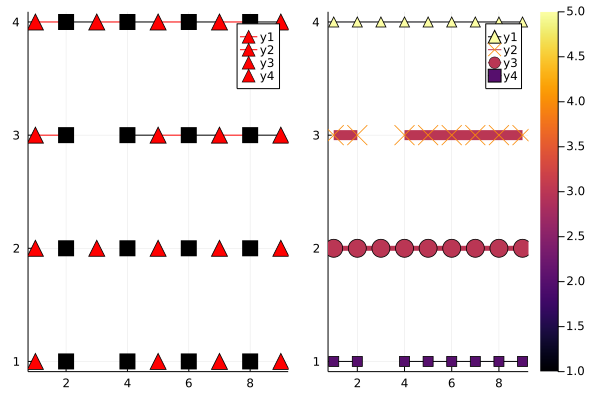

In [6]:
using Base.Iterators: cycle, take
yv = ones(9)
ys = [1; 1; NaN; ones(6)]
y = 5 .- [yv 2ys 3yv 4ys]
plt_color_rows = plot(y, seriestype = [:path :path :scatter :scatter], markershape = collect(take(cycle((:utriangle, :rect)), 9)), markersize = 8, color = collect(take(cycle((:red, :black)), 9)))
plt_z_cols = plot(y, markershape = [:utriangle :x :circle :square], markersize = [5 10 10 5], marker_z = [5 4 3 2], line_z = [1 3 3 1], linewidth = [1 10 5 1])
plot(plt_color_rows, plt_z_cols)

## Polar heatmaps

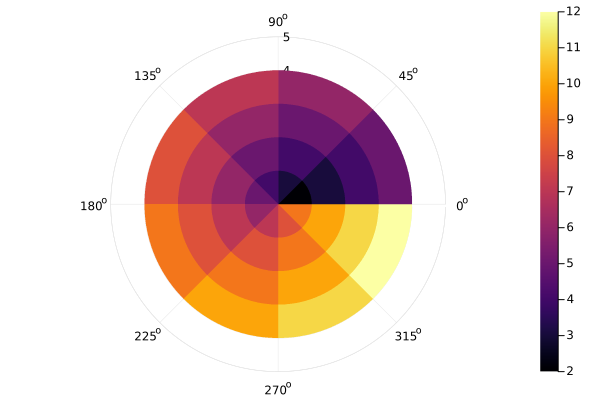

In [7]:
x = range(0, 2π, length = 9)
y = 0:4
z = (1:4) .+ (1:8)'
heatmap(x, y, z, projection = :polar)

## 3D surface with axis guides

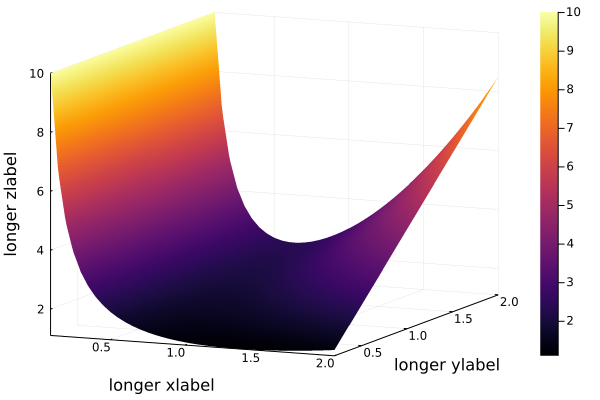

In [8]:
f(x, a) = begin
    1 / x + a * x ^ 2
end
xs = collect(0.1:0.05:2.0)
as = collect(0.2:0.1:2.0)
x_grid = [x for x = xs for y = as]
a_grid = [y for x = xs for y = as]
plot(x_grid, a_grid, f.(x_grid, a_grid), st = :surface, xlabel = "longer xlabel", ylabel = "longer ylabel", zlabel = "longer zlabel")

## 3d quiver

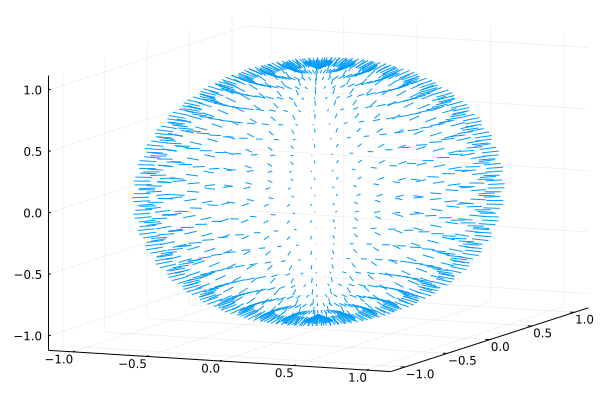

In [12]:
using Plots
ϕs = range(-π, π, length = 50)
θs = range(0, π, length = 25)
θqs = range(1, π - 1, length = 25)
x = vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
y = vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
z = vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θs)])
u = 0.1 * vec([sin(θ) * cos(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
v = 0.1 * vec([sin(θ) * sin(ϕ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
w = 0.1 * vec([cos(θ) for (ϕ, θ) = Iterators.product(ϕs, θqs)])
quiver(x, y, z, quiver = (u, v, w))

## Step Types
A comparison of the various step-like seriestypes

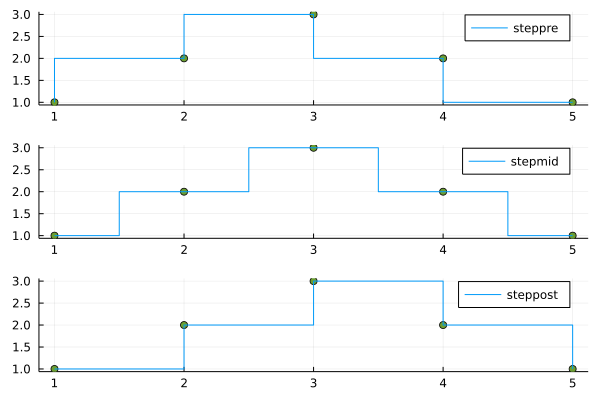

In [15]:
x = 1:5
y = [1, 2, 3, 2, 1]
default(shape = :circle)
plot(plot(x, y, markershape = :circle, seriestype = :steppre, label = "steppre"), plot(x, y, markershape = :circle, seriestype = :stepmid, label = "stepmid"), plot(x, y, markershape = :circle, seriestype = :steppost, label = "steppost"), layout = (3, 1))

## Guide positions and alignment

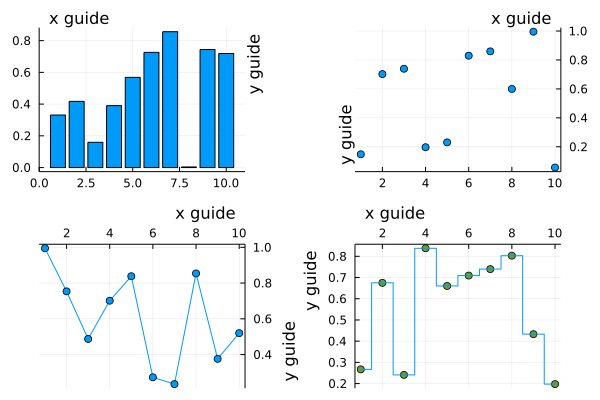

In [16]:
plot(rand(10, 4), layout = 4, xguide = "x guide", yguide = "y guide", xguidefonthalign = [:left :right :right :left], yguidefontvalign = [:top :bottom :bottom :top], xguideposition = :top, yguideposition = [:right :left :right :left], ymirror = [false true true false], xmirror = [false false true true], legend = false, seriestype = [:bar :scatter :path :stepmid])


## 3D axis flip / mirror

In [17]:
using LinearAlgebra
scalefontsizes(0.4)
(x, y) = (collect(-6:0.5:10), collect(-8:0.5:8))
args = (x, y, ((x, y)->begin
                sinc(norm([x, y]) / π)
            end))
kwargs = Dict(:xlabel => "x", :ylabel => "y", :zlabel => "z", :grid => true, :minorgrid => true)
plots = [wireframe(args..., title = "wire"; kwargs...)]
for ax = (:x, :y, :z)
    push!(plots, wireframe(args..., title = "wire-flip-$(ax)", xflip = ax == :x, yflip = ax == :y, zflip = ax == :z; kwargs...))
end
for ax = (:x, :y, :z)
    push!(plots, wireframe(args..., title = "wire-mirror-$(ax)", xmirror = ax == :x, ymirror = ax == :y, zmirror = ax == :z; kwargs...))
end
plt = plot(plots..., layout = @layout([_ ° _; ° ° °; ° ° °]), margin = 0 * Plots.px)
resetfontsizes()
plt

## Bar plot customizations
Width of bars may be specified as bar_width. The bars' baseline may be specified as fillto. Each may be scalar, or a vector spcifying one value per bar.

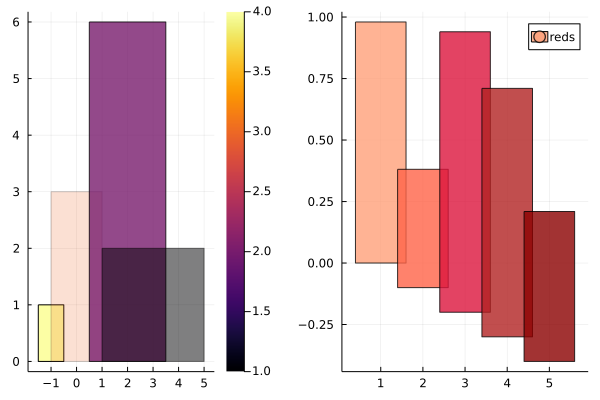

In [18]:
plot(bar([-1, 0, 2, 3], [1, 3, 6, 2], fill_z = 4:-1:1, alpha = [1, 0.2, 0.8, 0.5], label = "", bar_width = 1:4), bar(rand(5), bar_width = 1.2, alpha = 0.8, color = [:lightsalmon, :tomato, :crimson, :firebrick, :darkred], fillto = 0:-0.1:-0.4, label = "reds"))